# Regresión Logistica

Sirve para predecir los valores de una variable categórica en función de una (o más) variables independientes (features). Es un método de clasificación.

Regresión Logística Binomial: cuando la salida (target, variable dependiente) es Verdadero-Falso, 0-1, Si-No (ver figura)

Regresión lineal con una transformación para que solo regrese dos valores. A esa transformación se le llama función de activación (utilizada en redes neuronales artificiales). Hay varias funciones con el comportamiento deseado pero la más usada es la función sigmoide.

$f(y) = \frac{1}{1+\exp{-y1}}$


$ y = a_0 + a_1 x_1 + a_2 x_2 $

In [2]:
#Importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')


In [3]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


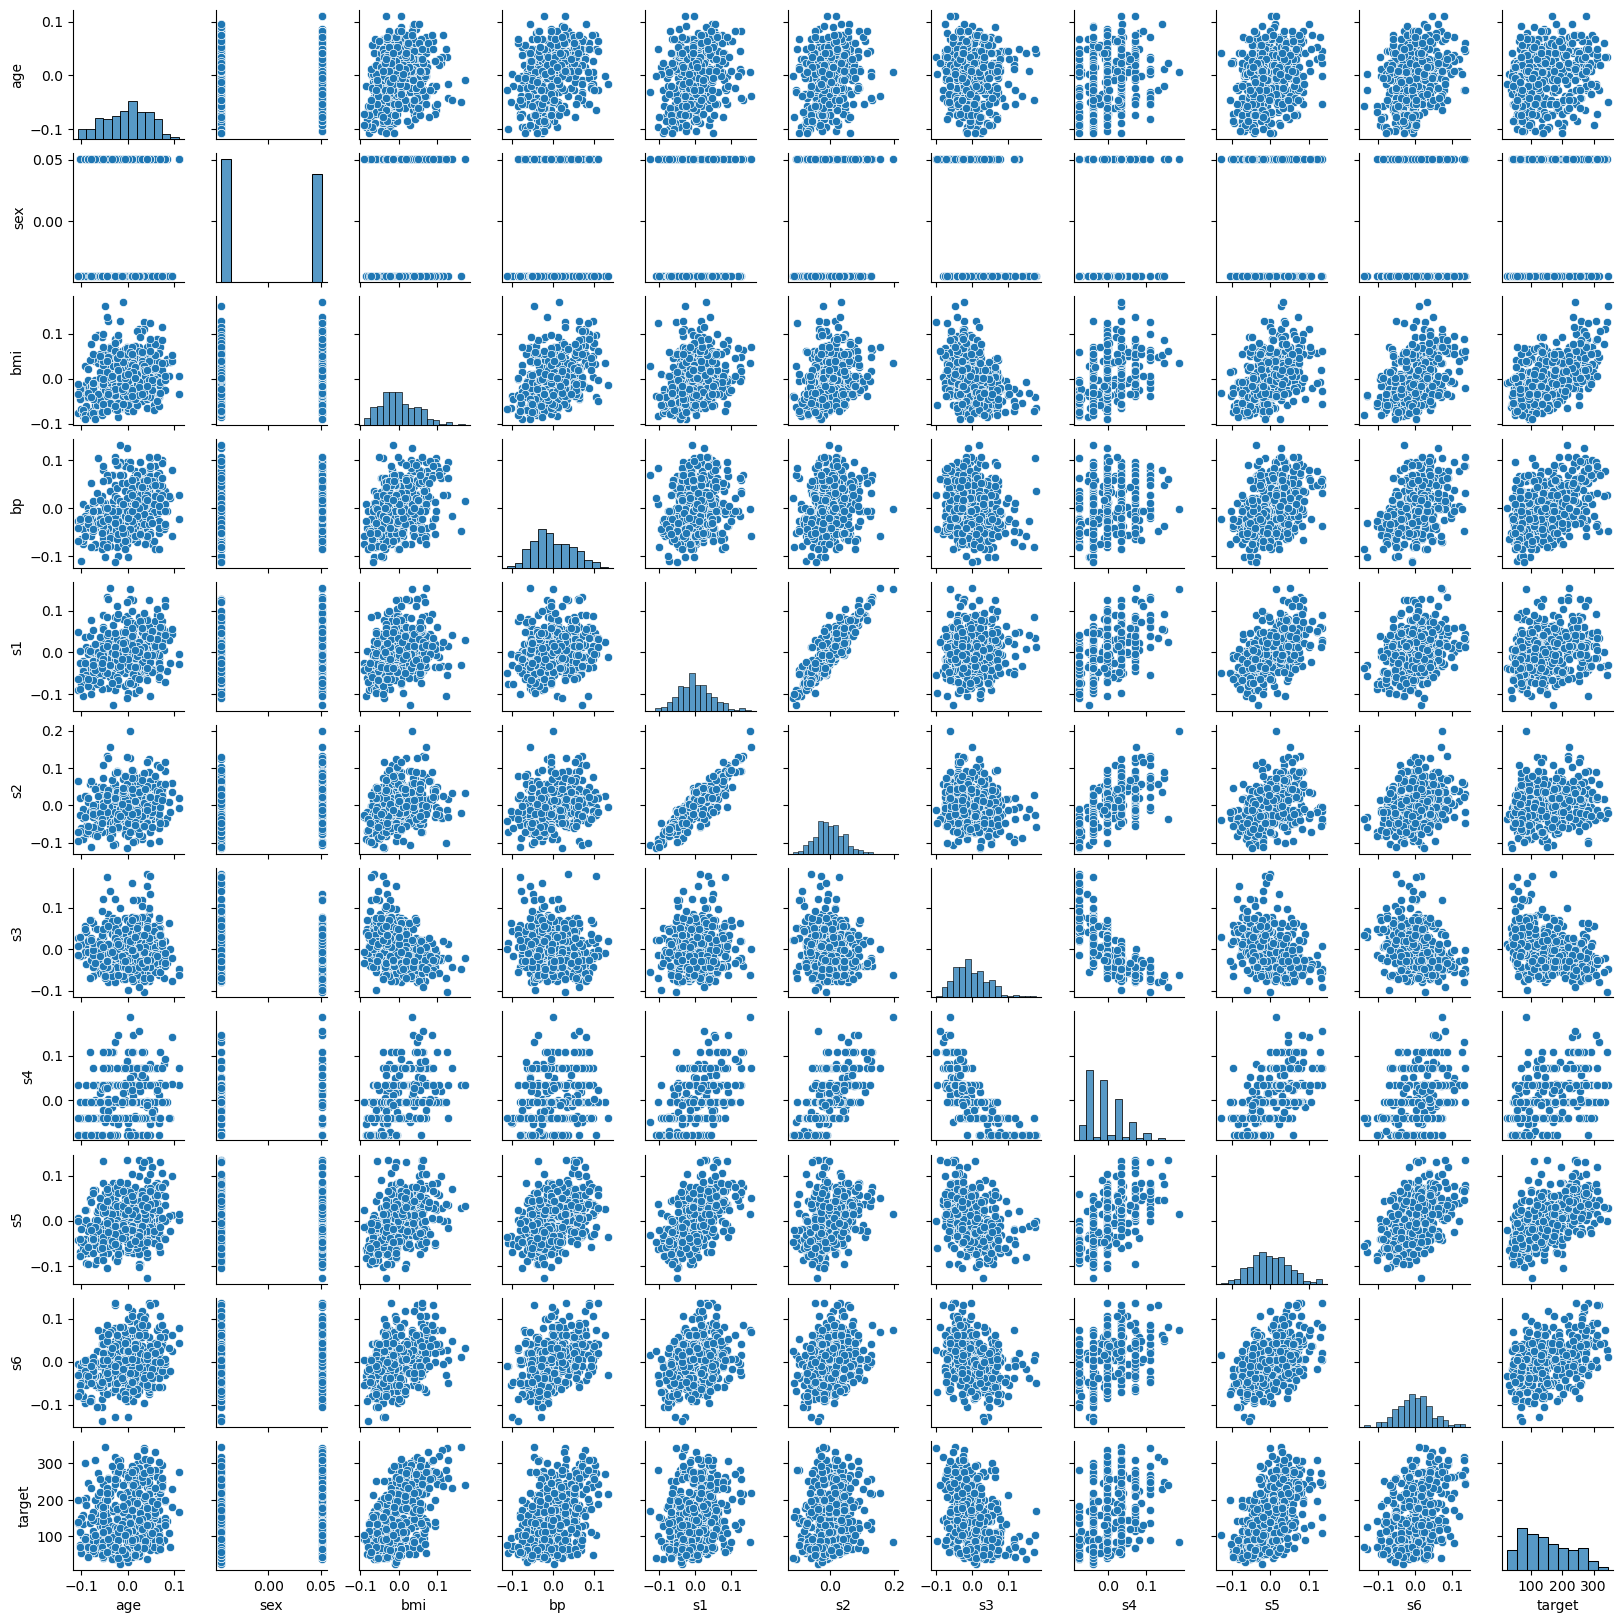

In [4]:
sns.pairplot(df, height=1.5);

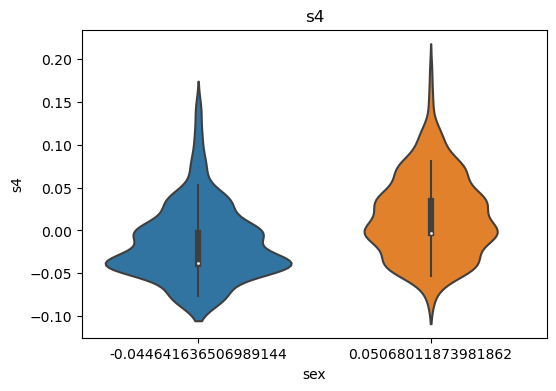

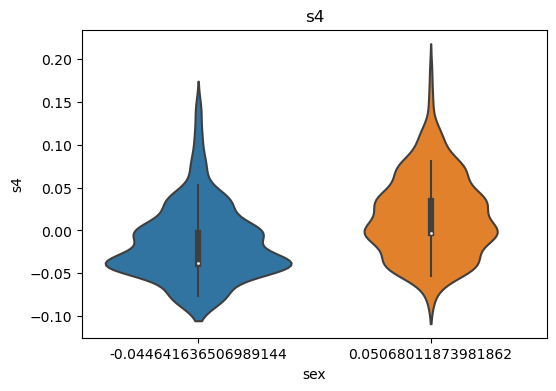

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(x = 'sex', y = 's4', data = df, ax = ax)
ax.set_title('s4');
plt.show()

In [10]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['s4']] #df.drop(columns=['sex'])
y = df[['sex']]

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit_transform(np.ravel(y)) # 1D array

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,

In [12]:
y = le.fit_transform(df[['sex']])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

In [14]:
#reg_log.predict_proba(X_test)

In [15]:

print('coef: ', reg_log.coef_)
print('intercept: ', reg_log.intercept_)
print('score: ', reg_log.score(X, y))

coef:  [[2.02087096]]
intercept:  [-0.08494578]
score:  0.6018099547511312


In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1], dtype=int64)

In [17]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
reg_log = sm.Logit(y_train, X_train,)
reg_log = reg_log.fit()
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.639216
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  309
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 May 2023   Pseudo R-squ.:                 0.07663
Time:                        14:19:28   Log-Likelihood:                -197.52
converged:                       True   LL-Null:                       -213.91
Covariance Type:            nonrobust   LLR p-value:                 1.031e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0797      0.120     -0.663      0.508      -0.315       0.156
s4            14.5236      2.

In [18]:
intervalos_conf = reg_log.conf_int(alpha=0.05)
intervalos_conf

,0,1
const,-0.315284,0.155978
s4,9.129839,19.917434


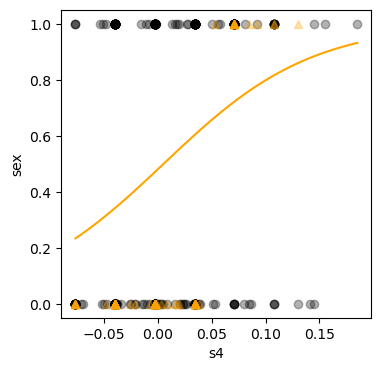

In [19]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(X.values, y, 'ok', alpha=0.3)
ax.plot(X_test.values, y_pred, '^', color='orange', ms=6, alpha=0.3)

ax.set_xlabel('s4')
ax.set_ylabel('sex')

grid_X = np.linspace(X.min(), X.max(), 100)
grid_X = sm.add_constant(grid_X)
predicciones = reg_log.predict(grid_X)

ax.plot(grid_X[:, 1], predicciones, color = "orange")
plt.show()

### Evaluación del desempeño del modelo

In [20]:
accuracy_score(y_test, y_pred)

0.6165413533834586

In [21]:
def accuracy(TP, TN, FP, FN):
    a = (TP + TN) / (TP + TN + FP + FN)
    return a * 100

def sensibilidad(TP, TN, FP, FN):
    s = TP / (TP + FN)
    return s * 100

def especificidad(TP, TN, FP, FN):
    e = TN / (TN + FP)
    return e * 100

def evaluar_modelo(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    (TN, FP, FN, TP) = matrix.ravel()

    print(f"Exactitud: {accuracy(TP, TN, FP, FN)}")
    print(f"Sensibilidad: {sensibilidad(TP, TN, FP, FN)}")
    print(f"Especificidad: {especificidad(TP, TN, FP, FN)}")

In [22]:
m = confusion_matrix(y_test, y_pred)
m

array([[69,  5],
       [46, 13]], dtype=int64)

In [23]:
(TN, FP, FN, TP) = m.ravel()
(TN, FP, FN, TP)

(69, 5, 46, 13)

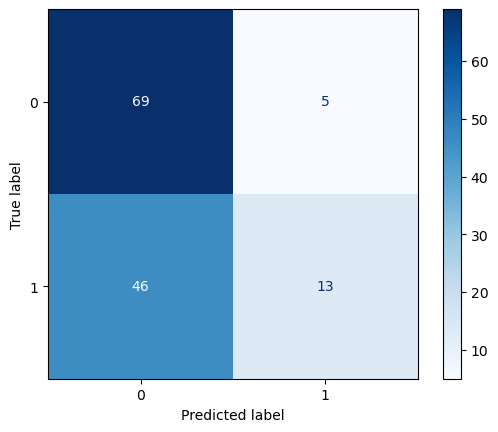

<Figure size 640x480 with 0 Axes>

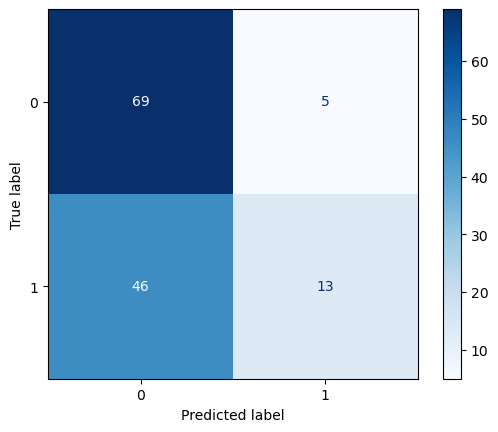

In [46]:
plt.clf()
ConfusionMatrixDisplay(m).plot(cmap=plt.cm.Blues)
plt.show()

In [25]:

evaluar_modelo(y_test, y_pred)

Exactitud: 61.65413533834586
Sensibilidad: 22.033898305084744
Especificidad: 93.24324324324324


# Regresión logistica para otra variable

# S1

coef:  [[0.27916366]]
intercept:  [-0.08414186]
score:  0.5316742081447964
Optimization terminated successfully.
         Current function value: 0.691259
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  309
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 May 2023   Pseudo R-squ.:                0.001449
Time:                        14:47:49   Log-Likelihood:                -213.60
converged:                       True   LL-Null:                       -213.91
Covariance Type:            nonrobust   LLR p-value:                    0.4311
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0840      0.114 

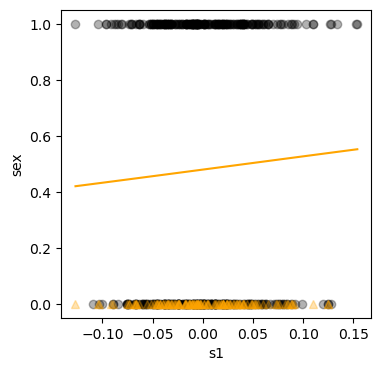

(74, 0, 59, 0)

In [73]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['s1']] #df.drop(columns=['sex'])
y = df[['sex']]

le = preprocessing.LabelEncoder()
le.fit_transform(np.ravel(y)) # 1D array

y = le.fit_transform(df[['sex']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)


print('coef: ', reg_log.coef_)
print('intercept: ', reg_log.intercept_)
print('score: ', reg_log.score(X, y))

y_pred



X_train = sm.add_constant(X_train)
reg_log = sm.Logit(y_train, X_train,)
reg_log = reg_log.fit()
print(reg_log.summary())

intervalos_conf = reg_log.conf_int(alpha=0.05)
intervalos_conf
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(X.values, y, 'ok', alpha=0.3)
ax.plot(X_test.values, y_pred, '^', color='orange', ms=6, alpha=0.3)

ax.set_xlabel('s1')
ax.set_ylabel('sex')

grid_X = np.linspace(X.min(), X.max(), 100)
grid_X = sm.add_constant(grid_X)
predicciones = reg_log.predict(grid_X)

ax.plot(grid_X[:, 1], predicciones, color = "orange")
plt.show()


accuracy_score(y_test, y_pred)

m = confusion_matrix(y_test, y_pred)

(TN, FP, FN, TP) = m.ravel()
(TN, FP, FN, TP)

In [74]:
(TN, FP, FN, TP) = m.ravel()
(TN, FP, FN, TP)

(74, 0, 59, 0)

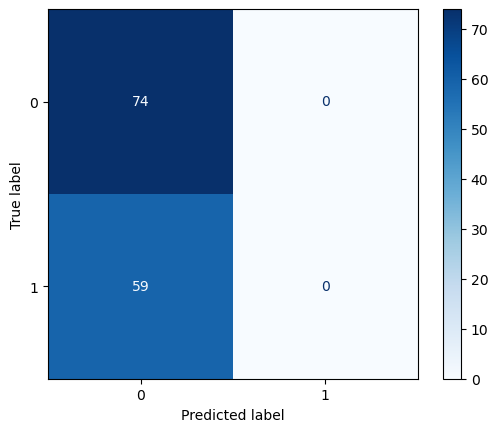

In [75]:
ConfusionMatrixDisplay(m).plot(cmap=plt.cm.Blues);
plt.show()

In [76]:
evaluar_modelo(y_test, y_pred)

Exactitud: 55.639097744360896
Sensibilidad: 0.0
Especificidad: 100.0


# S2

coef:  [[0.90556701]]
intercept:  [-0.08380258]
score:  0.5384615384615384
Optimization terminated successfully.
         Current function value: 0.681657
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  309
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 May 2023   Pseudo R-squ.:                 0.01532
Time:                        14:48:06   Log-Likelihood:                -210.63
converged:                       True   LL-Null:                       -213.91
Covariance Type:            nonrobust   LLR p-value:                   0.01046
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0820      0.115 

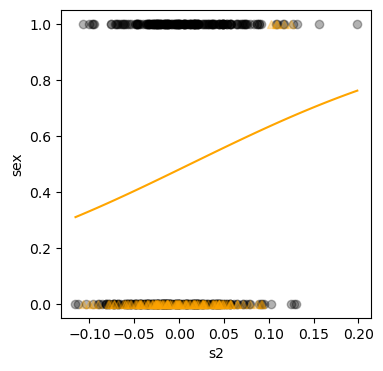

(72, 2, 56, 3)

In [77]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['s2']] #df.drop(columns=['sex'])
y = df[['sex']]

le = preprocessing.LabelEncoder()
le.fit_transform(np.ravel(y)) # 1D array

y = le.fit_transform(df[['sex']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)


print('coef: ', reg_log.coef_)
print('intercept: ', reg_log.intercept_)
print('score: ', reg_log.score(X, y))

y_pred



X_train = sm.add_constant(X_train)
reg_log = sm.Logit(y_train, X_train,)
reg_log = reg_log.fit()
print(reg_log.summary())

intervalos_conf = reg_log.conf_int(alpha=0.05)
intervalos_conf
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(X.values, y, 'ok', alpha=0.3)
ax.plot(X_test.values, y_pred, '^', color='orange', ms=6, alpha=0.3)

ax.set_xlabel('s2')
ax.set_ylabel('sex')

grid_X = np.linspace(X.min(), X.max(), 100)
grid_X = sm.add_constant(grid_X)
predicciones = reg_log.predict(grid_X)

ax.plot(grid_X[:, 1], predicciones, color = "orange")
plt.show()


accuracy_score(y_test, y_pred)

m = confusion_matrix(y_test, y_pred)

(TN, FP, FN, TP) = m.ravel()
(TN, FP, FN, TP)

In [78]:

accuracy_score(y_test, y_pred)

0.5639097744360902

In [79]:
m = confusion_matrix(y_test, y_pred)
(TN, FP, FN, TP) = m.ravel()
(TN, FP, FN, TP)

(72, 2, 56, 3)

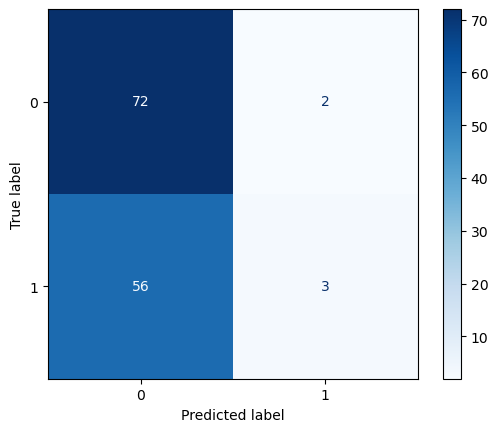

In [80]:
ConfusionMatrixDisplay(m).plot(cmap=plt.cm.Blues);
plt.show()

# S3

coef:  [[-2.25968237]]
intercept:  [-0.08336472]
score:  0.6561085972850679
Optimization terminated successfully.
         Current function value: 0.622247
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  309
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 May 2023   Pseudo R-squ.:                  0.1011
Time:                        14:48:25   Log-Likelihood:                -192.27
converged:                       True   LL-Null:                       -213.91
Covariance Type:            nonrobust   LLR p-value:                 4.771e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1135      0.123

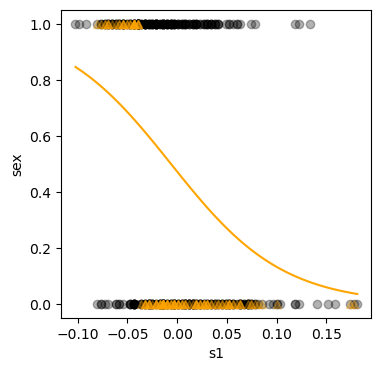

(64, 10, 36, 23)

In [81]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['s3']] #df.drop(columns=['sex'])
y = df[['sex']]

le = preprocessing.LabelEncoder()
le.fit_transform(np.ravel(y)) # 1D array

y = le.fit_transform(df[['sex']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)


print('coef: ', reg_log.coef_)
print('intercept: ', reg_log.intercept_)
print('score: ', reg_log.score(X, y))

y_pred



X_train = sm.add_constant(X_train)
reg_log = sm.Logit(y_train, X_train,)
reg_log = reg_log.fit()
print(reg_log.summary())

intervalos_conf = reg_log.conf_int(alpha=0.05)
intervalos_conf
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(X.values, y, 'ok', alpha=0.3)
ax.plot(X_test.values, y_pred, '^', color='orange', ms=6, alpha=0.3)

ax.set_xlabel('s1')
ax.set_ylabel('sex')

grid_X = np.linspace(X.min(), X.max(), 100)
grid_X = sm.add_constant(grid_X)
predicciones = reg_log.predict(grid_X)

ax.plot(grid_X[:, 1], predicciones, color = "orange")
plt.show()


accuracy_score(y_test, y_pred)

m = confusion_matrix(y_test, y_pred)

(TN, FP, FN, TP) = m.ravel()
(TN, FP, FN, TP)

In [82]:
accuracy_score(y_test, y_pred)

0.6541353383458647

In [83]:
m = confusion_matrix(y_test, y_pred)
(TN, FP, FN, TP) = m.ravel()
(TN, FP, FN, TP)

(64, 10, 36, 23)

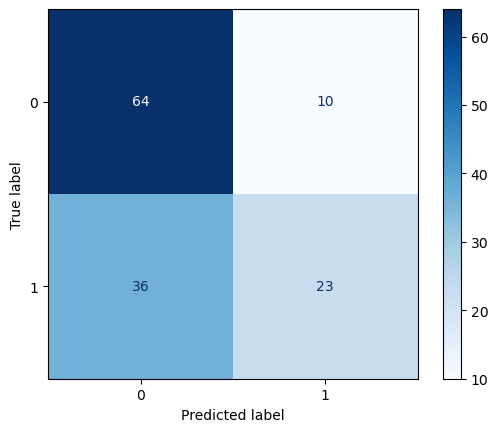

In [84]:
ConfusionMatrixDisplay(m).plot(cmap=plt.cm.Blues);
plt.show()

# S5

coef:  [[0.87759]]
intercept:  [-0.0834871]
score:  0.5339366515837104
Optimization terminated successfully.
         Current function value: 0.682759
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  309
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 May 2023   Pseudo R-squ.:                 0.01373
Time:                        14:50:14   Log-Likelihood:                -210.97
converged:                       True   LL-Null:                       -213.91
Covariance Type:            nonrobust   LLR p-value:                   0.01538
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0804      0.115     

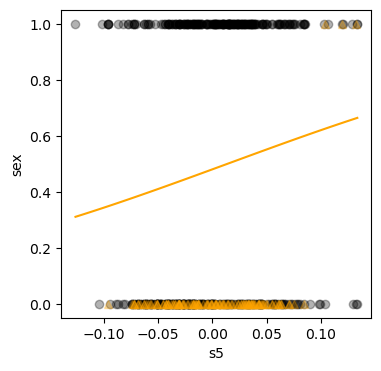

(72, 2, 58, 1)

In [85]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['s5']] #df.drop(columns=['sex'])
y = df[['sex']]

le = preprocessing.LabelEncoder()
le.fit_transform(np.ravel(y)) # 1D array

y = le.fit_transform(df[['sex']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)


print('coef: ', reg_log.coef_)
print('intercept: ', reg_log.intercept_)
print('score: ', reg_log.score(X, y))

y_pred



X_train = sm.add_constant(X_train)
reg_log = sm.Logit(y_train, X_train,)
reg_log = reg_log.fit()
print(reg_log.summary())

intervalos_conf = reg_log.conf_int(alpha=0.05)
intervalos_conf
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(X.values, y, 'ok', alpha=0.3)
ax.plot(X_test.values, y_pred, '^', color='orange', ms=6, alpha=0.3)

ax.set_xlabel('s5')
ax.set_ylabel('sex')

grid_X = np.linspace(X.min(), X.max(), 100)
grid_X = sm.add_constant(grid_X)
predicciones = reg_log.predict(grid_X)

ax.plot(grid_X[:, 1], predicciones, color = "orange")
plt.show()


accuracy_score(y_test, y_pred)

m = confusion_matrix(y_test, y_pred)

(TN, FP, FN, TP) = m.ravel()
(TN, FP, FN, TP)

In [86]:
accuracy_score(y_test, y_pred)

0.5488721804511278

In [87]:
m = confusion_matrix(y_test, y_pred)
(TN, FP, FN, TP) = m.ravel()
(TN, FP, FN, TP)

(72, 2, 58, 1)

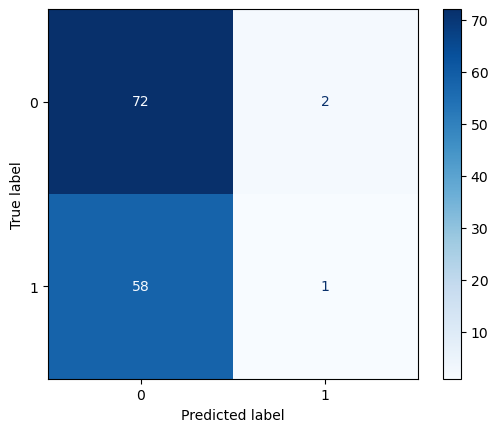

In [88]:
ConfusionMatrixDisplay(m).plot(cmap=plt.cm.Blues);
plt.show()

# Regresión Binomial Multiple